We first begin with importing libraries and download csv file that contains the data

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from config import INSURANCE_DATA_URL
# import data
insurance = pd.read_csv(INSURANCE_DATA_URL)

We first begin with looking into data and look out if the the data is clean nad formatted right.

In [6]:
# Display the first few rows of the dataset
insurance.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#check for coluumns types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


All the columns look good and are formatted correctly. We can see that age, bmi, children, charges are numbers whereas sex, smoker, and region are possibly categories. 

In [8]:
# Display summary statistics for the numerical columns in the insurance dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see that the mean values for age, BMI, and children are reasonable. The minimum age is 18 and the maximum is 64, which indicates the age range allowed by the company for insurance. The BMI values also look reasonable, with a minimum of 16 and a maximum of 53, which covers the typical range from underweight to severely obese. The average number of children is about 1.1, which is typical for western countries. The lowest insurance charge is 1122, likely for a customer who rarely visits the doctor, while the highest charge is 63770.

In [9]:
#check for duplicat values
insurance.drop_duplicates(inplace=True)


In [10]:
insurance.shape

(1337, 7)

Exploratory Analysis and Visualization

In this section, we will explore the dataset by visualizing the distribution of values in key columns. We will also examine the relationships between "charges" and other variables to gain insights into the factors that may influence insurance costs.

for the visualization we use Matplotlib.plotly, Seaborn and plotly

In [11]:
# import libraries
import plotly.express as px
import matplotlib as mat


Let's improve the default style and font sizes for our charts

In [12]:
# make the plots look better
sns.set_style('darkgrid')
mat.rcParams['font.size'] = 14
mat.rcParams['figure.figsize'] = (10, 6)
mat.rcParams['figure.facecolor'] = '#000000'



#### Age 

Age is quantitive  column. The minumium age in the dataset is 18 and the maximium is 64. Whe can create for each year a bin using histgram so that we can see the distrubition visually. Also we are going to add a box plot.


In [13]:
# See the summary statistics of the 'age' column in the insurance dataset
insurance.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [14]:
# Create a histogram to visualize the distribution of age in the insurance dataset as well as a box plot to show the distribution of age
fig = px.histogram(insurance, x='age', nbins = 47, 
                  title = 'Age Distribution of health Insurance Customers', 
                  marginal = 'box'
                 )
fig.update_layout(bargap = 0.1)
fig.show()

lets find out why there is a lot of 18 - 19 year customers compare to other ages.
first lets look could this caused by some offers that they are getting.
i want to create I scatter plot between age and charge to see do they have less charges to pay.

In [15]:
# Create a scatter plot to visualize the relationship between age and charges with a trendline, colored by smoker status
age_vs_charges_scatter = px.scatter(
    insurance,
    x='age',
    y='charges',
    title='Age vs Charges',
    trendline='ols',
    trendline_color_override='red',
    color='smoker'
)
age_vs_charges_scatter.update_traces(marker=dict(size=10, opacity=0.5, line=dict(width=1, color='DarkSlateGrey')))
age_vs_charges_scatter.update_layout(title_font=dict(size=20), xaxis_title_font=dict(size=16), yaxis_title_font=dict(size=16))
age_vs_charges_scatter.update_xaxes(title_text='Age', title_font=dict(size=16))
age_vs_charges_scatter.update_yaxes(title_text='Charges', title_font=dict(size=16))
age_vs_charges_scatter.update_layout(template='plotly_dark')

age_vs_charges_scatter.show()

We can make the following observations from the above chart:

- Medical charges generally increase with age, as expected. However, there is significant variation at every age, so age alone does not determine medical charges.
- There appear to be three main clusters of data points:
    - The largest cluster consists mainly of non-smokers with relatively low medical charges.
    - The second cluster includes both smokers and non-smokers. This may represent non-smokers with health issues and smokers without major health issues.
    - The third cluster consists exclusively of smokers with very high medical charges, likely due to smoking-related health problems.

Overall, while age is a factor, smoking status has a strong impact on medical charges, and there are other factors influencing the variation as well.


#### Body Mass Index
Let's look the BMI of customers using histogram


In [16]:
fig = px.histogram(
    insurance,
    x='bmi',
    marginal='box',
    color_discrete_sequence = ['purple'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

We can see that the interquartile range for BMI is approximately 26–34. The distribution is roughly normal and centered around 30. Most customers fall into the overweight or obese categories. There are a non outliers on the lower end, but few on the higher end.

#### Charges 

Let's visualize the distrubution of the annual medical charges for customers. This is the column we're trying to predict so for better visualizations we add categorical column 'smoker'.

In [17]:
fig = px.histogram(
    insurance,
    x = 'charges',
    marginal = 'box',
    color = 'smoker',
    color_discrete_sequence= ['red', 'green'],
    title = 'Distribution of Charges by Smoking Status'
)
fig.update_layout(bargap = 0.1)
fig.show()

There is a significant difference in insurance charges between smokers and non-smokers. Most customers pay between $2,000 and $12,000, but smokers are much more likely to have higher charges, often forming two distinct groups: one with moderate charges and another with very high charges. This may indicate that the amount someone smokes also affects their costs. The distribution of charges is heavily skewed like "power law graph", with a small number of customers paying much higher amounts. This clearly shows that smoking greatly increases insurance costs.

## Let's examine how gender affects insurance charges. 



In [18]:
fig = px.histogram(
    insurance,
    x = 'charges',
    marginal = 'box',
    color = 'sex',
    color_discrete_sequence = ['pink', 'blue'],
    title  = 'Distribution of charges by gender'
)
fig.update_layout(bargap = 0.1)
fig.show()

Both males and females pay similar insurance charges, with the median around $9,000 for both groups. However, males show greater variability in charges, and there are more males among those with the highest charges. This may be due to lifestyle differences or riskier behaviors that can lead to higher medical costs for men. Overall, gender does not appear to have a major impact on the typical insurance charge, but it may influence the likelihood of incurring very high charges.

## Let's examine how region affects insurance charges. 

In [19]:


fig = px.histogram(
     insurance,
     x = 'charges',
     marginal = 'box',
     color = 'region',
    title  = 'Distribution of charges by gender'
)
fig.update_layout(bargap = 0.1)
fig.show()

The Southwest region has the least variation in charges and the lowest median charge, around $8,800. The Southeast shows the greatest variation, with many people paying both very low and very high amounts; its mean charge is about $9,200. Overall, the region where a customer lives does not strongly correlate with insurance charges.

## smoker
Let's visualize the distribution of the smoker (gender included) column using a histogram.

In [20]:
insurance.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [21]:
fig = px.histogram( insurance, 
                   x = 'smoker',
                   color = 'sex',
                  title = 'Distribution of smoker status')
fig.update_layout(bargap = 0.1)
fig.show()

## Sex

Let's look the distribution of gender

In [22]:
insurance.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [23]:
fig = px.histogram(
    insurance,
    x = 'sex',
    color = 'sex',
    title= 'Distribution of region'
)

fig.update_layout(bargap = 0.1)
fig.show()

## region

Let's look the distribution of region

In [24]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [25]:
fig = px.histogram(
    insurance,
    x = 'region',
    color = 'region',
    title= 'Distribution of region'
)

fig.update_layout(bargap = 0.1)
fig.show()

## Children
Let's look the distribution of children

In [26]:
fig = px.histogram(
    insurance,
    x = 'children',
    color = 'children',
    title = 'Distribution of Children'
)

fig.update_layout(bargap = 0.1)
fig.show()

The data visualization indicates that having no children or only one child is the most common scenario within this population. The likelihood of having more than two children drops significantly, highlighting a strong skew towards smaller family sizes or childlessness.

### BMI and Charge

we going to visualize does BMI correlate to charge using scatter plot

In [27]:
fig = px.scatter(insurance,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 title = 'BMI vs Charges by Smoking Status',
                 opacity= 0.7,
                 hover_data= ['sex'],
                 trendline = 'ols')
fig.update_traces(marker_size = 5)
fig.show()

The data shows that for smokers, there is a clear difference in charges between obese and non-obese individuals—obese smokers tend to pay much higher charges. However, for non-smokers, BMI does not have a significant impact on charges; both obese and non-obese non-smokers have small difference in  insurance costs.

## children and charges
Let's investigate whether there is a correlation between the number of children a customer has and their insurance costs. We'll visualize the relationship to see if having more children leads to higher insurance charges.

In [28]:
fig = px.violin(insurance,
                x = 'children',
                y = 'charges',
                title = 'Charges by Number of Children',
                color = 'children')
fig.show()

The number of children does not show a clear or strong effect on insurance charges. 

## Sex and Charges 
Let's investigate whether there is a correlation between customer gender and their insurance costs. We'll visualize the relationship to see if certain gender leads to higher insurance charges.

In [29]:
fig = px.violin(
    insurance,
    x='sex',
    y='charges',
    title='Charges by gender',
    color = 'sex'
)
fig.show()

The gender does not show a clear or strong effect on insurance charges. 

### Region and Charges 

Let's investigate whether there is a correlation between region and their insurance costs. We'll visualize the relationship to see if certain region leads to higher insurance charges.

In [30]:
fig = px.violin(insurance,
                x = 'region',
                y = 'charges',
                title = 'Charges by gender',
                color = 'region')
fig.show()

Correlation between numerical variables can be quantified using a correlation coefficient, which measures the strength and direction of the linear relationship between two variables. A correlation value close to 1 indicates a strong positive relationship, while a value close to -1 indicates a strong negative relationship. A value near 0 suggests little or no linear correlation. Calculating correlations helps us understand how changes in one variable may be associated with changes in another, which is useful for identifying important predictors and relationships in the data.

In [31]:
smoker = {"no": 0, "yes":1}
insurance.smoker = insurance.smoker.map(smoker)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


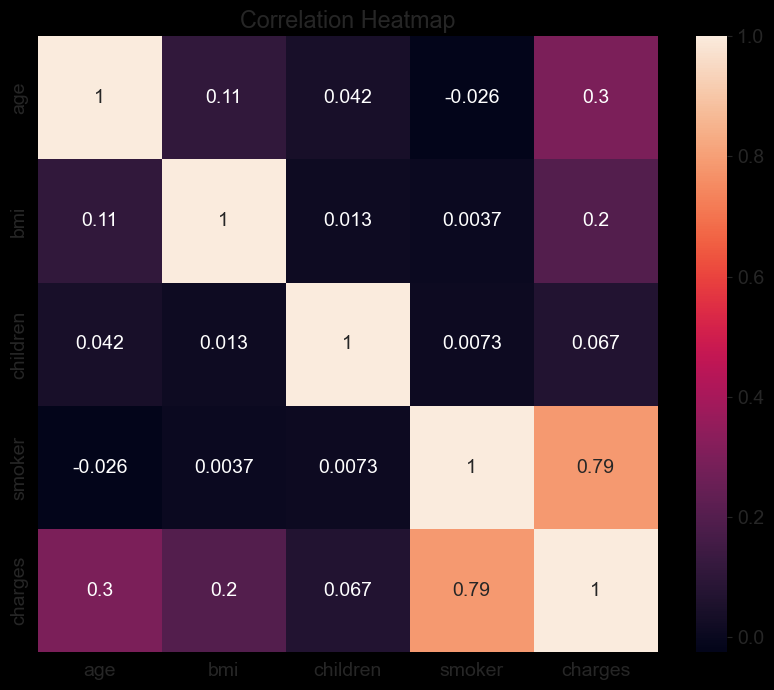

In [32]:

numerical_columns = insurance.select_dtypes(include= [np.number])
numerical_columns.head()
plt.figure(figsize=(10, 8))
sns.heatmap(
    numerical_columns.corr(),
    annot=True,
    linecolor='black'
)
plt.title('Correlation Heatmap')
plt.show()

# Correlation vs causation fallacy:

 A high correlation doesn't mean one thing causes another. Two things X and Y can happen together for different reasons: X might cause Y, or Y might cause X, or something else Z might cause both X and Y. The correlation breaks down when you remove the real cause. Sometimes X and Y just look connected because you didn't look at enough examples.
This might seem obvious, but computers can't tell the difference between things that just happen together and things that actually cause each other. When automated systems make important decisions, this can seriously impact society. That's why humans need to figure out what's really causing what - computers can spot patterns, but they can't understand the "why" behind them.


# Linear Regression using a Single Feature

We found that smoking status and age have the strongest correlation with insurance charges. Now let's see if we can predict charges based on age alone, but only for non-smokers. To do this, we'll first create a separate dataset that includes only the non-smoker data.

In [33]:
non_smoker_df = insurance[insurance['smoker'] == 0]
non_smoker_df.head()


,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160


Let's visualize the relationship between "age" and "charges"

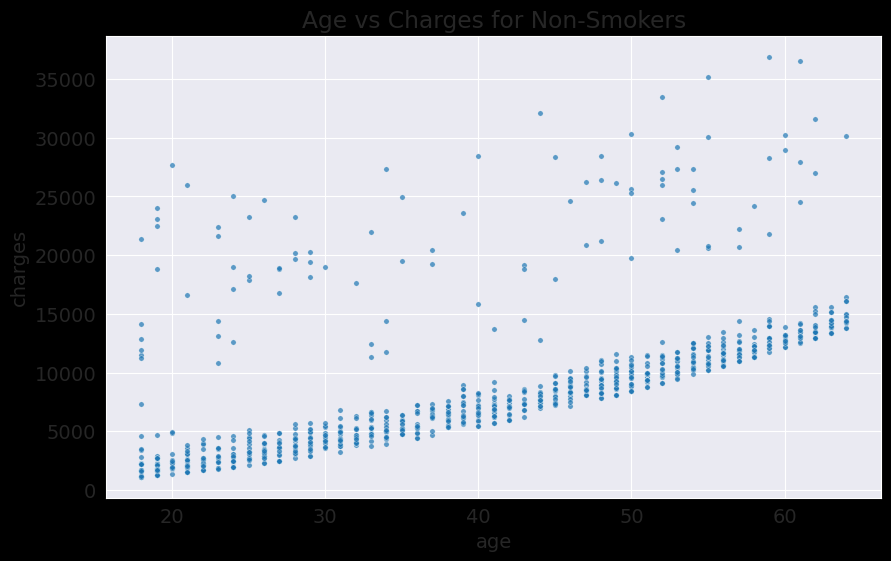

In [34]:
plt.title("Age vs Charges for Non-Smokers")

sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.style.use('default')

It looks like most of the data points are in the lower portion of the scatter plot. They follow a linear pattern, so we can fit a straight line through these points and use it to predict charges based on age.

A line on an X-Y coordinate system follows this formula:
y = wx + b
This line is defined by two key numbers:

w (the slope): determines how steep the line is - how much y increases when x increases by 1
b (the intercept): where the line crosses the y-axis when x = 0

Once we find the best values for w and b using our data, we can predict charges for any given age by plugging the age value into our formula.

# Model
Since age is on the x-axis and charges are on the y-axis, our formula becomes:

Charges = w * Age + b
Our goal is to find the best values for w and b that create a line fitting our data points.

Key terminology:

* Linear regression: This technique of finding the best-fitting straight line through data points. We call our equation a "linear regression model" because it represents the relationship between age and charges as a straight line.

* Parameters (or weights): The values w and b that we're trying to find. These define our specific line.

* Inputs: The age values from our dataset. These are what we feed into our model to make predictions.

* Targets: The actual charges values from our dataset. these are what we're trying to predict.

Once we determine the optimal w and b values, we can predict insurance charges for any age by simply plugging the age into our formula.



In [35]:
def predict_charges(age, w, b):
    """
    Predicts the insurance charges based on age using a linear regression model.
    
    Parameters:
    age (float): The age of the individual.
    w (float): The slope of the regression line.
    b (float): The y-intercept of the regression line.
    
    Returns:
    float: The predicted insurance charges.
    """
    return w * age + b

In [36]:
b = 50
w = 100
predict_charges(20, w, b)
ages = non_smoker_df['age']
non_smoker_df.head()
predicted_charges = predict_charges(ages,w,b)

Let's use line graph

Text(0, 0.5, 'Estimated Charges')

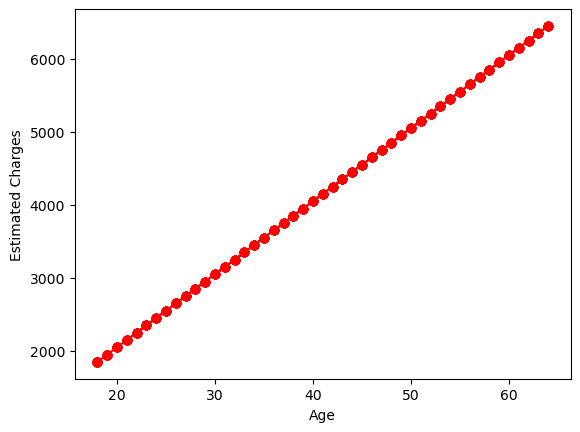

In [37]:
plt.plot(ages, predicted_charges, 'r-o')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

Let's overlay our predicted line on top of the actual data points to visually check how well our model fits the data. This will help us see if our linear regression model is a good representation of the relationship between age and charges for non-smokers.

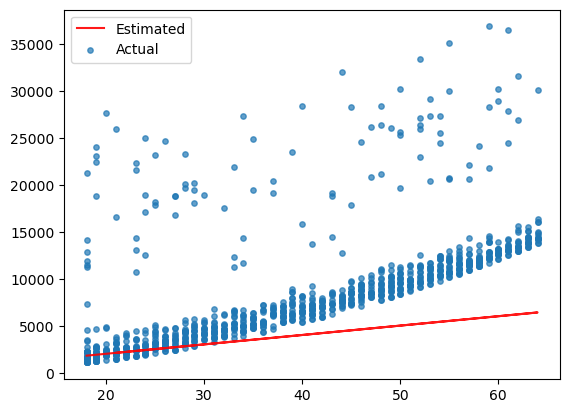

In [38]:
plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
plt.scatter(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)
plt.xlabel = 'Age'
plt.ylabel = 'Charges'
plt.legend(['Estimated', 'Actual'])


Our initial guess for the parameters was not accurate. Let's try an intuitive approach by manually adjusting the values of w and b to see if we can get closer to a good fit.

In [39]:
def try_estimate(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predicted_charges = predict_charges(ages,w,b)

    plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
    plt.scatter( x = ages, y = target, alpha = 0.7, s= 15)
    plt.xlabel = 'Age'
    plt.ylabel = 'Charges'
    plt.legend(['Estimated', 'Actual'])


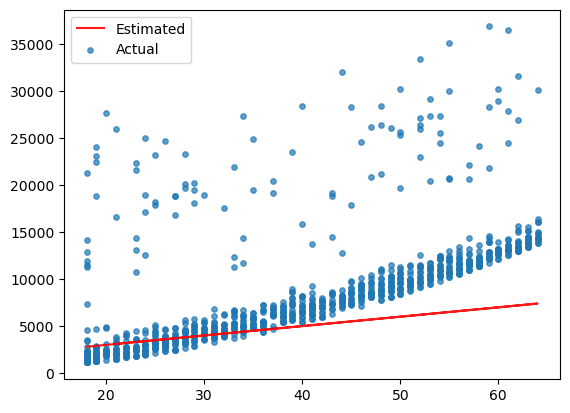

In [40]:
try_estimate(100,1000)

# Loss/Cost functions

Loss (or cost) functions measure how well our model's predictions match the actual data. Two common loss functions are RMSE (Root Mean Squared Error) and MAE (Mean Absolute Error). Both work by calculating the difference between the predicted values and the actual data points, then summarizing these differences into a single number. Lower values indicate a better fit to the data.

In [41]:
def RMSE (predicted, target):
    """
    Calculates the Root Mean Squared Error (RMSE) between predicted and target values.
    
    Parameters:
    predicted (array-like): The predicted values.
    target (array-like): The actual target values.
    
    Returns:
    float: The RMSE value.
    """
    return np.sqrt(np.mean((predicted - target) ** 2))

In [42]:
def MAE(predicted, target):
    """
    Calculates the  Mean Absolute Error (MAE) between predicted and target values.
    
    Parameters:
    predicted (array-like): The predicted values.
    target (array-like): The actual target values.
    
    Returns:
    float: The MAE value.
    """
    return np.mean(np.abs(predicted - target))

In [43]:
MAE(50, 100)

50.0

In [44]:
RMSE(50, 100)


50.0

We can see that RMSE (Root Mean Squared Error) is more sensitive to outliers than MAE (Mean Absolute Error). This is because RMSE squares the errors before averaging, giving more weight to larger errors, while MAE treats all errors equally. As a result, outliers have a greater impact on RMSE, making it higher when extreme values are present.

In [45]:
def try_parameters(w,b):
    ages = non_smoker_df['age']
    target = non_smoker_df['charges']
    predicted_charges = predict_charges(ages,w,b)

    plt.plot(ages, predicted_charges, 'r', alpha = 0.9)
    plt.scatter( x = ages, y = target, alpha = 0.7, s= 15)
    plt.xlabel = 'Age'
    plt.ylabel = 'Charges'
    plt.legend(['Estimated', 'Actual'])

    print("MAE: ", MAE(predicted_charges, target))
    print("RMSE: ", RMSE(predicted_charges, target))


MAE:  2843.2573304976486
RMSE:  4754.944649618778


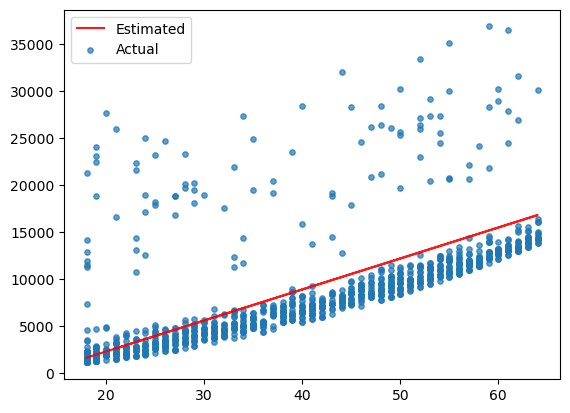

In [46]:
try_parameters(330,-4300)

# Optimizer

It is difficult to achieve a very small error by manually adjusting the parameters. To build a more accurate model, let's use a mathematical approach to find the best-fitting line.

Ordinary Least Squares: (better for smaller datasets)
Stochastic gradient descent: (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.


In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [50]:
inputs = non_smoker_df[['age']]
target = non_smoker_df.charges

In [52]:
model.fit(inputs, target)

LinearRegression()

In [53]:
model.predict(np.array([[23],
                        [37], 
                        [61]]))

c:\Users\bashi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4058.71368614,  7798.37016075, 14209.20983152])

In [56]:
predictions = model.predict(inputs)
predictions

array([2723.12208806, 5394.30528422, 6729.89688229, ..., 2723.12208806,
       2723.12208806, 3524.47704691])